##  Linear Regression on Bank Personal Loan Model


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

In [8]:
data=pd.read_excel("Linear Regression.xlsx",sheet_name=0)
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [11]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [12]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

## LINEAR REGRESSION MODEL BETWEEN PRICE AND SQFT

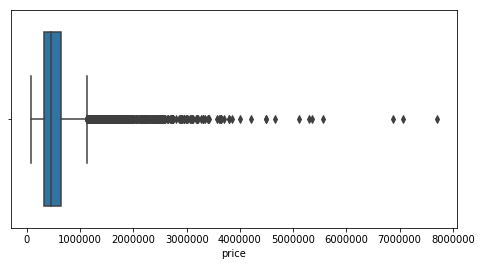

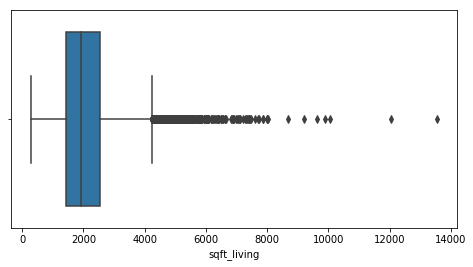

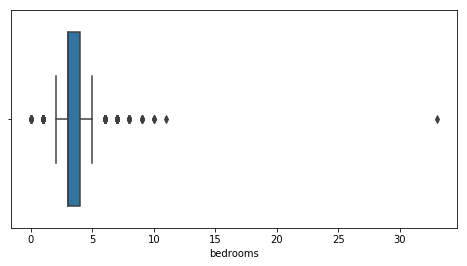

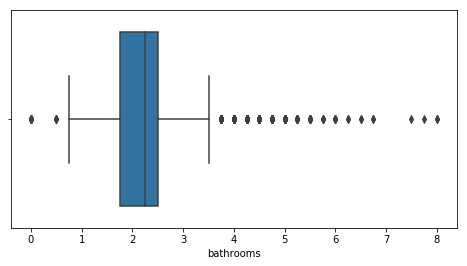

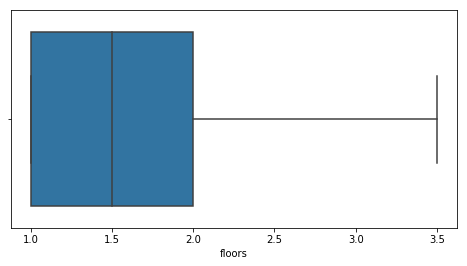

In [6]:
for i in data.columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.boxplot(data[i],ax=ax)

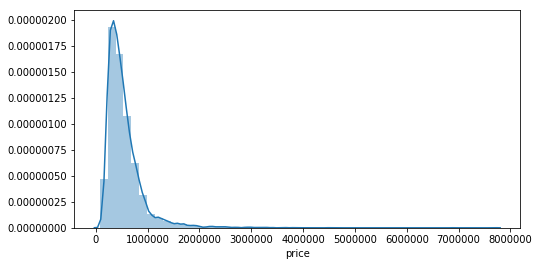

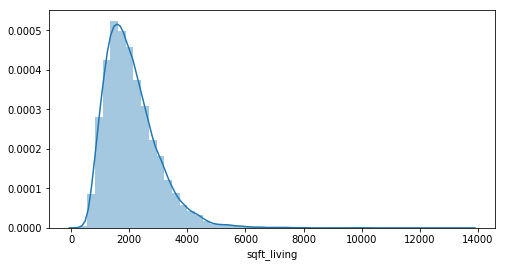

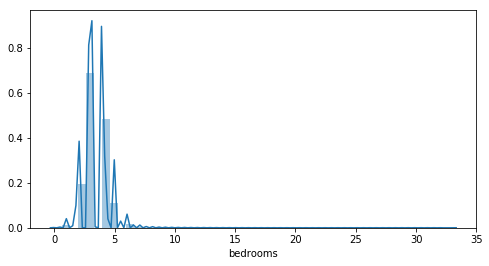

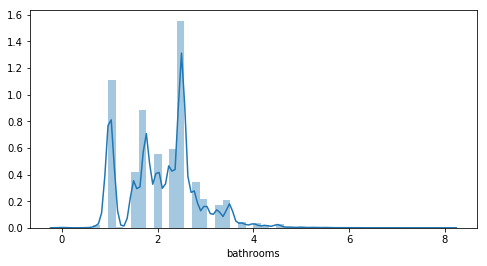

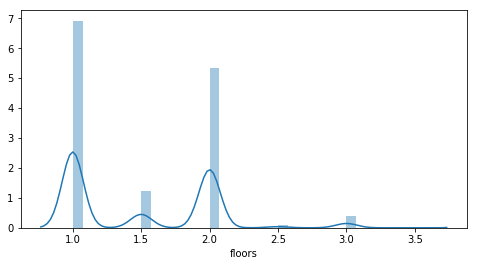

In [7]:
for i in data.columns:
    fig, ax = plt.subplots(figsize=(8,4))
    sns.distplot(data[i],ax=ax)

## Data Visualization Inferences
1) The dependent variable price is unimodal,right skewed and has many outliers.

2) The independent variable area of living in square feet is unimodal,right skewed and has many outliers.

3) The independent variable number of bedrooms is multimodal and has moderate outliers.

4) The independent variable number of bathrooms is multimodal and has moderate outliers.

5) The independent variable number of floors is multimodal and has no outliers.

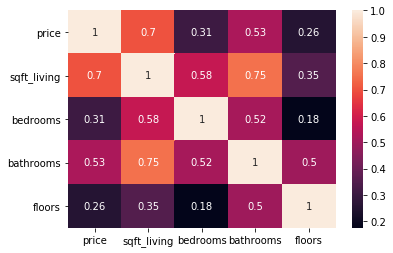

In [13]:
sns.heatmap(data.corr(), annot = True)

## Correlation Inferences

1) The target variable price has good correlation with area of living in square feet 

2) Bathrooms has good correlation with sqft_living

3) moderate correlation with number of bathrooms and bedrooms 

4) almost no correlation with number of floors.

# Model 1
Price as dependent variable and area of living in square feet as independent variable. Since both the variables are continuous a simple linear regression model is used.

## Splitting the dataset into training and testing data

In [10]:
y=data.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [11]:
x=data.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## Training the model

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [14]:
lin_reg.fit(x_train,y_train)

LinearRegression()

# Testing the model

In [15]:
ypred=lin_reg.predict(x_test)
ypred

array([[ 360116.30918286],
       [1261900.99730684],
       [ 362899.59525731],
       ...,
       [ 560512.90654374],
       [ 374032.73955514],
       [ 329500.16236383]])

In [16]:
from sklearn.metrics import r2_score,mean_squared_error
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)
print("Root mean square error is......",RMSE)
print("r square value is......",r_square)

Root mean square error is...... 264896.2296616816
r square value is...... 0.488899283822523



## Inferences

1) R-square value is 0.48 suggesting that only about 48% of the variance in the target variable i.e. price can be explained by the independent variable area of living.

2) Root mean square error is very high for the model suggesting that a large error exist in between the predicted value and the actual values of the target variable (price).

Not a good regression fit

## Model 2

Price as dependent variable and number of bedrooms as independent variable. Since both the varbiarbles are continuous a simple linear regression model is used.

# Splitting the dataset into training and testing data

In [19]:
x1=data.iloc[:,2:3]
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [20]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=0.3,random_state=1)

# Training the model

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg1=LinearRegression()

In [22]:
lin_reg1.fit(x1_train,y1_train)

LinearRegression()

# Testing the model

In [23]:
y_pred1=lin_reg1.predict(x1_test)
y_pred1

array([[609985.5089382 ],
       [495500.22465828],
       [381014.94037837],
       ...,
       [381014.94037837],
       [724470.79321812],
       [609985.5089382 ]])

## Calculating performance metrics of the model

In [24]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R-Square value is.......",r2_score(y1_test,y_pred1))
print("The RMSE value is.......",np.sqrt(mean_squared_error(y1_test,y_pred1)))

The R-Square value is....... 0.10047870759701027
The RMSE value is....... 374684.6359495244


## Inferences
1) R-square value is 0.10 suggesting that only about 10% of the variance in the target variable i.e. price can be explained by the independent variable number of bedrooms.

2) Root mean square error is very high for the model suggesting that a large error exist in between the predicted value and the actual values of the target variable (price).

Not a good regression fit

## Model 3
Price as dependent variable and number of bathrooms as independent variable. Since both the varbiarbles are continuous a simple linear regression model is used.

# Splitting the dataset into training and testing data

In [25]:

x2=data.iloc[:,3:4]
x2.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [26]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y,test_size=0.3,random_state=2)

# Training the model

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg2=LinearRegression()

In [28]:
lin_reg2.fit(x2_train,y2_train)

LinearRegression()

# Testing the model

In [29]:
y_pred2=lin_reg1.predict(x2_test)
y_pred2

array([[409636.26144835],
       [323772.29823841],
       [266529.65609845],
       ...,
       [438257.58251833],
       [409636.26144835],
       [352393.61930839]])

# Calculating performance metrics of the model

In [30]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R-Square value is.......",r2_score(y2_test,y_pred2))
print("The RMSE value is.......",np.sqrt(mean_squared_error(y2_test,y_pred2)))

The R-Square value is....... 0.0430371276888899
The RMSE value is....... 365145.1174609356


## Inferences
1) R-square value is 0.04 suggesting that only about 4% of the variance in the target variable i.e. price can be explained by the independent variable number of bathrooms.

2) Root mean square error is very high for the model suggesting that a large error exist in between the predicted value and the actual values of the target variable (price).

Not a good regression fit

## Model 4
Price as dependent variable and number of floors as independent variable. Since both the varbiarbles are continuous a simple linear regression model is used.

# Splitting the dataset into training and testing data

In [31]:

x3=data.iloc[:,4:]
x3.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [32]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y,test_size=0.3,random_state=3)

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg3=LinearRegression()


In [34]:
lin_reg3.fit(x3_train,y3_train)

LinearRegression()

In [35]:

y_pred3=lin_reg3.predict(x3_test)
y_pred3

array([[452432.3492184 ],
       [626942.29245276],
       [626942.29245276],
       ...,
       [452432.3492184 ],
       [452432.3492184 ],
       [452432.3492184 ]])

# Calculating performance metrics of the model

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R-Square value is.......",r2_score(y3_test,y_pred3))
print("The RMSE value is.......",np.sqrt(mean_squared_error(y3_test,y_pred3)))

The R-Square value is....... 0.0660669800768724
The RMSE value is....... 353816.49481193395


## Inferences
1) R-square value is 0.06 suggesting that only about 6% of the variance in the target variable i.e. price can be explained by the independent variable number of floors.

2) Root mean square error is very high for the model suggesting that a large error exist in between the predicted value and the actual values of the target variable (price).

Not a good regression fit

## Model 5
Price as dependent variable and area of living in square feet, number of bedrooms,number of bathrooms and number of floors as independent variables. Since all the varbiarbles are continuous a munltiple linear regression model is used.

# Splitting the dataset into training and testing data

In [37]:
x4=data.iloc[:,1:5]
x4.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [38]:
from sklearn.model_selection import train_test_split
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,test_size=0.3,random_state=4)

# Training the model

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg4=LinearRegression()

In [40]:
lin_reg4.fit(x4_train,y4_train)

LinearRegression()

# Testing the model

In [41]:
y_pred4=lin_reg4.predict(x4_test)
y_pred4

array([[520451.76087349],
       [605591.59004238],
       [412322.00294392],
       ...,
       [536017.4477493 ],
       [322835.93706476],
       [735091.72319132]])

# Calculating performance metrics of the model

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
print("The R-Square value is.......",r2_score(y4_test,y_pred4))
print("The RMSE value is.......",np.sqrt(mean_squared_error(y4_test,y_pred4)))

The R-Square value is....... 0.5005924823648306
The RMSE value is....... 259396.1436572631


# Inferences
1) R-square value is 0.5 suggesting that only about 50% or half of the variance in the target variable i.e. price can be explained by the independent variables area of living, number of bedrooms,number of bathrooms and number of floors.

2) Root mean square error is very high for the model suggesting that a large error exist in between the predicted value and the actual values of the target variable (price).